In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.datasets import fetch_california_housing

In [7]:
# from sklearn.datasets import load_boston

In [10]:
house=fetch_california_housing()

In [12]:
data=pd.DataFrame(house.data,columns=house.feature_names)

In [13]:
data.head(4)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25


In [16]:
house.target_names

['MedHouseVal']

In [18]:
house.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [19]:
data['price']=house.target

In [20]:
data.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


In [21]:
data.shape

(20640, 9)

In [22]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

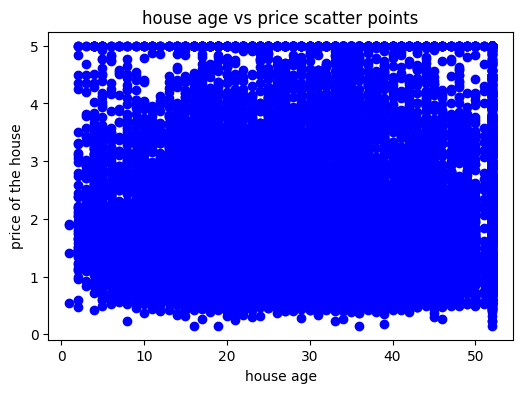

In [25]:
plt.figure(figsize=(6,4))
plt.scatter(data['HouseAge'],data['price'],color='b')
plt.title('house age vs price scatter points')
plt.xlabel('house age')
plt.ylabel('price of the house')
plt.show()

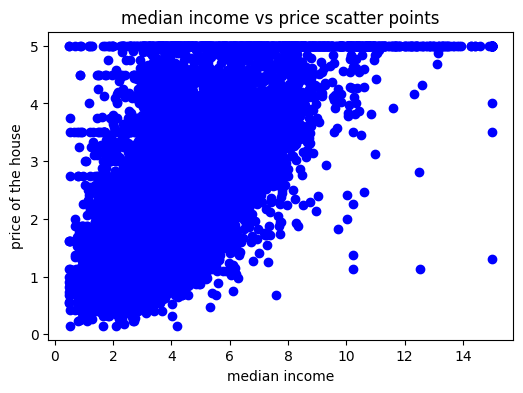

In [27]:
plt.figure(figsize=(6,4))
plt.scatter(data['MedInc'],data['price'],color='b')
plt.title('median income vs price scatter points')
plt.xlabel('median income')
plt.ylabel('price of the house')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
data.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


In [31]:
x=data.drop(['price'],axis=1)
y=data['price']

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
x_train.shape,y_train.shape

((16512, 8), (16512,))

In [37]:
x_test.shape,y_test.shape

((4128, 8), (4128,))

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
linear=LinearRegression()

In [40]:
linear.fit(x_train,y_train)

LinearRegression()

In [42]:
linear.coef_

array([ 4.48674910e-01,  9.72425752e-03, -1.23323343e-01,  7.83144907e-01,
       -2.02962058e-06, -3.52631849e-03, -4.19792487e-01, -4.33708065e-01])

In [45]:
linear.intercept_

-37.023277706064064

In [46]:
predictions=linear.predict(x_test)

In [47]:
predictions

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

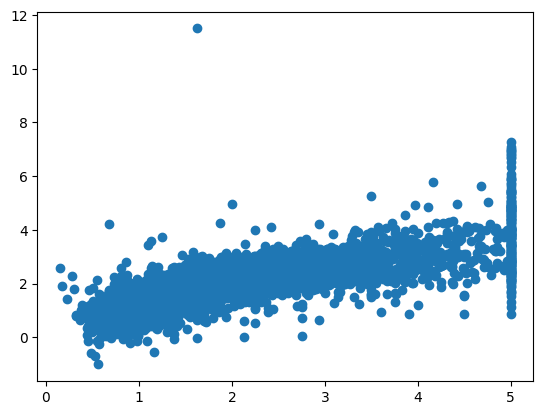

In [49]:
plt.scatter(y_test,predictions)

In [50]:
error=y_test-predictions

In [51]:
import seaborn as sns

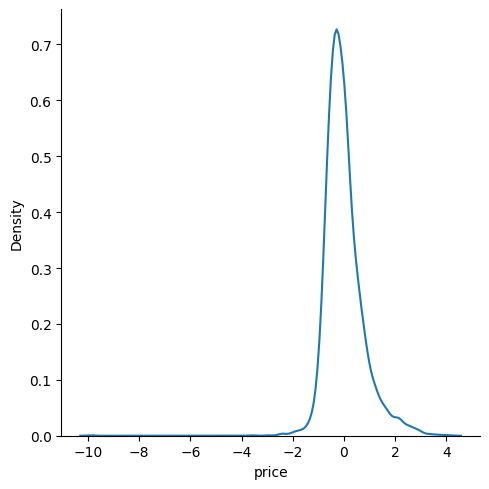

In [52]:
sns.displot(error,kind="kde")

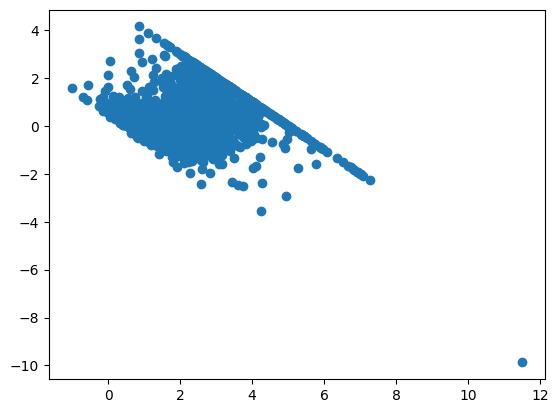

In [53]:
plt.scatter(predictions,error)

In [54]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
# from sklearn.

In [55]:
print(mean_squared_error(y_test,predictions))
print(mean_absolute_error(y_test,predictions))

0.555891598695244
0.5332001304956558


In [56]:
print(np.sqrt(mean_squared_error(y_test,predictions)))

0.7455813830127761


In [61]:
house.data[0].reshape(1,-1).shape

(1, 8)

In [62]:
linear.predict(house.data[0].reshape(1,-1))

C:\python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.15194269])

In [63]:
data.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


# pickling the model file for deployment

In [64]:
import pickle

In [65]:
pickle.dump(linear,open('regmodel.pkl','wb'))

In [66]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [67]:
pickled_model.predict(house.data[0].reshape(1,-1))

C:\python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.15194269])